<a href="https://colab.research.google.com/github/fuedgabriel/indicadores/blob/main/macd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
%matplotlib inline
!pip install yfinance
import yfinance as yf
yf.pdr_override()

In [ ]:
ticker = "BTC-USD"
nome = "BITCOIN"
start_date = "2024-01-01"
end_date = "2024-05-22"

# Baixar dados históricos
sol = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
sol

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347
...,...,...,...,...,...,...
2024-05-17,65231.296875,67459.460938,65119.316406,67051.875000,67051.875000,28031279310
2024-05-18,67066.210938,67387.328125,66663.500000,66940.804688,66940.804688,16712277406
2024-05-19,66937.929688,67694.296875,65937.179688,66278.367188,66278.367188,19249094538


In [ ]:
rapidMME = sol.High.ewm(span=12).mean()
lentaMME = sol.High.ewm(span=26).mean()

In [ ]:
MACD = rapidMME - lentaMME

In [ ]:
sinal = MACD.ewm(span=9).mean()

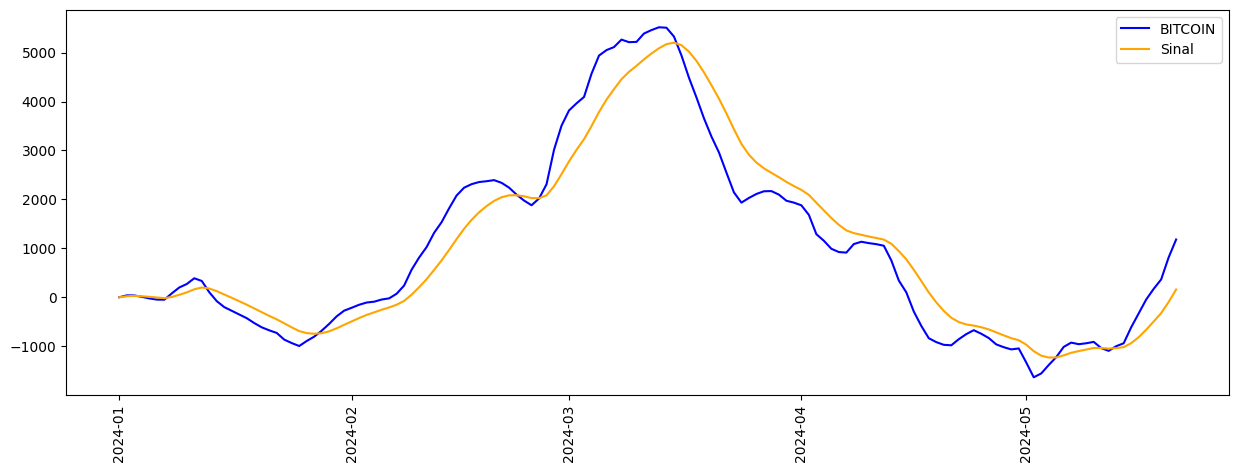

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(sol.index, MACD, label= nome, color='blue')
plt.plot(sol.index, sinal, label= 'Sinal', color='orange')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [ ]:
sol['MACD'] = MACD
sol['Sinal'] = sinal
sol

,Open,High,Low,Close,Adj Close,Volume,MACD,Sinal
Date,,,,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,44167.332031,18426978443,0.000000,0.000000
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,39335274536,38.685534,21.491964
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,42848.175781,46342323118,36.998698,27.847183
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210,8.852164,21.412556
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347,-23.211577,8.137885
...,...,...,...,...,...,...,...,...
2024-05-17,65231.296875,67459.460938,65119.316406,67051.875000,67051.875000,28031279310,-47.424987,-663.212927
2024-05-18,67066.210938,67387.328125,66663.500000,66940.804688,66940.804688,16712277406,170.558006,-496.458740
2024-05-19,66937.929688,67694.296875,65937.179688,66278.367188,66278.367188,19249094538,363.885731,-324.389846


In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

minimo=min([min(sol['Sinal']),min(sol['MACD'])])
maximo=max([max(sol['Sinal']),max(sol['MACD'])])

fig = make_subplots (vertical_spacing = 0, rows=2, cols=1, row_heights=[4,3])

fig.add_trace(go.Candlestick(x=sol.index, open= sol['Open'], high= sol['High'], low= sol['Low'], close= sol['Close']))

fig.add_trace(go.Scatter(x=sol.index, y= sol['MACD'], name='MACD', line=dict(color='blue')), row=2, col=1)
fig.add_trace(go.Scatter(x=sol.index, y=sol['Sinal'], name='Sinal', line=dict(color="yellow")), row=2, col=1)


fig.update_layout(  xaxis_rangeslider_visible=False,
                    xaxis=dict(zerolinecolor='black', showticklabels=False),
                    xaxis2=dict(showticklabels=False)
                    )

fig['layout']['yaxis2'].update(range=[minimo, maximo])
fig.update_xaxes(showline=True, linewidth=1, linecolor="black", mirror=False)
fig.show()



In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assume sol is your DataFrame with the necessary data

minimo = min([min(sol['Sinal']), min(sol['MACD'])])
maximo = max([max(sol['Sinal']), max(sol['MACD'])])

# Identify crossover points
crosses_up = (sol['MACD'] > sol['Sinal']) & (sol['MACD'].shift(1) <= sol['Sinal'].shift(1))
crosses_down = (sol['MACD'] < sol['Sinal']) & (sol['MACD'].shift(1) >= sol['Sinal'].shift(1))

# Initialize trading variables
cash = 0
asset = 0
total_investment = 0
profit = 0
porcentagemTotal = 0

# Track crossover pairs and percentage changes
crossover_pairs = []

# Track profit/loss
for i in range(len(sol)):
    if crosses_up.iloc[i]:
        # Buy $100 worth of asset
        cash -= 100
        asset += 100 / sol['Close'].iloc[i]
        total_investment += 100
        crossover_pairs.append(('up', sol.index[i], sol['Close'].iloc[i]))
    elif crosses_down.iloc[i]:
        # Sell all assets
        if asset > 0:
            cash += asset * sol['Close'].iloc[i]
            asset = 0
            total_investment = 0
            crossover_pairs.append(('down', sol.index[i], sol['Close'].iloc[i]))

# Final profit calculation
profit = cash

fig = make_subplots(vertical_spacing=0, rows=2, cols=1, row_heights=[4, 3])

# Candlestick chart
fig.add_trace(go.Candlestick(x=sol.index, open=sol['Open'], high=sol['High'], low=sol['Low'], close=sol['Close']), row=1, col=1)

# MACD and Sinal lines
fig.add_trace(go.Scatter(x=sol.index, y=sol['MACD'], name='MACD', line=dict(color='blue')), row=2, col=1)
fig.add_trace(go.Scatter(x=sol.index, y=sol['Sinal'], name='Sinal', line=dict(color='yellow')), row=2, col=1)

# Green markers for upward crossovers
fig.add_trace(go.Scatter(
    x=sol.index[crosses_up],
    y=sol['MACD'][crosses_up],
    mode='markers',
    marker=dict(color='green', size=10),
    name='Cross Up'
), row=2, col=1)

# Red markers for downward crossovers
fig.add_trace(go.Scatter(
    x=sol.index[crosses_down],
    y=sol['MACD'][crosses_down],
    mode='markers',
    marker=dict(color='red', size=10),
    name='Cross Down'
), row=2, col=1)

# Add gray lines and percentage change annotations
for i in range(1, len(crossover_pairs), 2):
    if crossover_pairs[i-1][0] == 'up' and crossover_pairs[i][0] == 'down':
        x0, y0 = crossover_pairs[i-1][1], crossover_pairs[i-1][2]
        x1, y1 = crossover_pairs[i][1], crossover_pairs[i][2]
        percentage_change = ((y1 - y0) / y0) * 100
        # Midpoint for annotation
        midpoint_x = x0 + (x1 - x0) / 2
        midpoint_y = sol['MACD'][x0] + (sol['MACD'][x1] - sol['MACD'][x0]) / 2
        fig.add_trace(go.Scatter(
            x=[x0, x1],
            y=[sol['MACD'][x0], sol['MACD'][x1]],
            mode='lines+text',
            line=dict(color='gray', width=1, dash='dash'),
            text=[None, f'   {percentage_change:.2f}%'],
            textposition='middle right',
            showlegend=False
        ), row=2, col=1)
        porcentagemTotal = (porcentagemTotal + percentage_change)

# Add profit/loss to the legend
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(color='white'),
    name=f'Porcentagem Total: {porcentagemTotal:.2f}%'

))

fig.update_layout(
    xaxis_rangeslider_visible=False,
    xaxis=dict(zerolinecolor='black', showticklabels=False),
    xaxis2=dict(showticklabels=False),
    legend=dict(yanchor="top", y=1.1, xanchor="left", x=0.01),
    height=900,  # Increase the height
    width=1750,  # Increase the width
    margin=dict(l=20, r=20, t=20, b=20)  # Reduce margins to use more space
)

fig['layout']['yaxis2'].update(range=[minimo, maximo])
fig.update_xaxes(showline=True, linewidth=1, linecolor="black", mirror=False)
fig.show()
